# ÊºîÁøíIII Á¨¨ÔºîÂõû „ÉÑ„Ç§„ÉÉ„Çø„Éº„ÉÜ„Ç≠„Çπ„ÉàËß£Êûê

Âá∫ÂÖ∏Ôºöhttps://qiita.com/e10persona/items/7a7643b266c2bdfbf7d0

Google Colab Áî®

In [ ]:
!apt install aptitude
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.7

ÂøÖË¶Å„Å™„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´

In [1]:
!pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org tweepy mecab-python3 wordcloud oseti

„É©„Ç§„Éñ„É©„É™„ÅÆ„Ç§„É≥„Éù„Éº„Éà„ÇíË°å„ÅÑ„Åæ„Åô„ÄÇ

In [375]:
import tweepy
import MeCab
import csv
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
import oseti
import collections

Ë®ºÊòéÊõ∏Èñ¢‰øÇ„Ç®„É©„ÉºÈò≤Ê≠¢

In [3]:
import os
os.environ['CURL_CA_BUNDLE'] = ''
warnings.simplefilter('ignore')

## MeCab „ÅÆ„ÉÜ„Çπ„Éà

‚Äª MeCab „ÅØÂà•ÈÄî„Ç§„É≥„Çπ„Éà„Éº„É´„Åó„Å¶„Åä„Åè„Åì„Å®

In [4]:
mecab = MeCab.Tagger("-Ochasen") 
malist = mecab.parse("„Åô„ÇÇ„ÇÇ„ÇÇ„ÇÇ„ÇÇ„ÇÇ„ÇÇ„ÇÇ„ÅÆ„ÅÜ„Å°")
print(malist)

„Åô„ÇÇ„ÇÇ	„Çπ„É¢„É¢	„Åô„ÇÇ„ÇÇ	ÂêçË©û-‰∏ÄËà¨		
„ÇÇ	„É¢	„ÇÇ	Âä©Ë©û-‰øÇÂä©Ë©û		
„ÇÇ„ÇÇ	„É¢„É¢	„ÇÇ„ÇÇ	ÂêçË©û-‰∏ÄËà¨		
„ÇÇ	„É¢	„ÇÇ	Âä©Ë©û-‰øÇÂä©Ë©û		
„ÇÇ„ÇÇ	„É¢„É¢	„ÇÇ„ÇÇ	ÂêçË©û-‰∏ÄËà¨		
„ÅÆ	„Éé	„ÅÆ	Âä©Ë©û-ÈÄ£‰ΩìÂåñ		
„ÅÜ„Å°	„Ç¶„ÉÅ	„ÅÜ„Å°	ÂêçË©û-ÈùûËá™Á´ã-ÂâØË©ûÂèØËÉΩ		
EOS



## Tweet „ÅÆÂèñÂæó

In [5]:
CK = 'X6CkomphPSRlb3FyZDJrYU0Z2'                             # Consumer Key
CS = 'VTT4d6vARlrMM90RRrWrqWH9IALSccLUltiGx0v4WA6O9uVnS1'    # Consumer Secret
AT = '5710242-20WdXf5snVQuOThPNEK7KaoYDdhNHodZ57TlcICFuF'    # Access Token
AS = 'jLIt16Pl7hGqv7iRsNnrD7eFTXHJxfPYHIHjpkjhog3oX'         # Accesss Token Secert

auth = tweepy.OAuthHandler(CK, CS)
auth.set_access_token(AT, AS)
api = tweepy.API(auth, wait_on_rate_limit=True)

### ÁâπÂÆö„É¶„Éº„Ç∂„ÅÆ Tweet „ÇíÂèñÂæó

In [303]:
tweets = tweepy.Cursor(api.user_timeline, screen_name="ndanyusi", tweet_mode = 'extended')

### ÊåáÂÆö„Åó„Åü„Ç≠„Éº„ÉØ„Éº„Éâ„ÇíÂê´„ÇÄ Tweet „ÇíÂèñÂæó

In [389]:
tweets = tweepy.Cursor(api.search_tweets, q="Èò≤Ë°õÂ§ß exclude:retweets", include_entities = True, 
tweet_mode = 'extended', lang = 'ja', result_type = 'mixed')

## ÁµêÊûú„ÅÆË°®Á§∫

In [311]:
for tweet_json in tweets.items(3):
    #print(tweet_json)
    tweet = tweet_json._json
    print(tweet['full_text'].replace('\n',' '))
    print("=================================")

@jijicom https://t.co/3lp6XON0oV Êµ∑‰∏ä‰øùÂÆâÂÆò„Å´„ÅØ„ÄÅÂàëÊ≥ï„ÇÑÂõΩÈöõÊ≥ï„ÇíÂê´„ÇÄÊ≥ïÂ≠¶„ÅÆÁ¥†È§ä„Äå„ÇÇ„ÄçË¶ÅÊ±Ç„Åï„Çå„Çã„ÄÇ (by Ê≥ïÂ≠¶ÈÉ®Âçí„ÄÇ)  „Å°„Å™„Åø„Å´„ÄÅ#Èò≤Â§ß „ÅØÊñáÁ≥ª„ÅÆÂ≠¶Áîü„Å´„ÇÇ„ÄÅÁã≠„ÅÑ„Å™„Åå„Çâ„ÇÇÈñÄÊà∏„ÇíÈñã„ÅÑ„Å¶„ÅÑ„Çã (by È´òÊ†°„ÅÆÊüêÂêåÁ¥öÁîü(ÊñáÁ≥ª)„ÅåÈò≤Â§ß„Å´ÈÄ≤„Çì„Å†)„ÄÇ
#Ê®™È†àË≥Ä #Èò≤Â§ß  ‰ª§Âíå3Âπ¥Â∫¶Èò≤Ë°õÂ§ßÂ≠¶Ê†°ÈñãÊ†°Á•≠„Å´‰º¥„ÅÜ„Ç∏„Çß„ÉÉ„ÉàÊ©ü„ÅÆÈ£õË°å‰∫àÂÆö„Å´„Å§„ÅÑ„Å¶Ôºà2021Âπ¥11Êúà4Êó•Ôºâ https://t.co/UBO0Xex44o  https://t.co/yjaWlaiUb8 https://t.co/1jWhPmyLKA
#Ê®™È†àË≥Ä #Êµ¶Ë≥Ä #Èò≤Â§ß  Êµ¶Ë≥ÄÈßÖ„Åß1Â≠¶Âπ¥Áîü„ÇíÂëº„Å≥Ê≠¢„ÇÅ„Å¶ÈñãÊ†°Á•≠„Å´„Å§„ÅÑ„Å¶Ë≥™Âïè„Åó„Å†„Åå„ÄÅ„ÇÑ„ÅØ„ÇäÂÆ∂Êóè„ÅÆ„ÅøÊãõÂæÖ„Åß‰∏ÄËà¨ÂÖ¨Èñã„ÅØÁÑ°„ÅÑ„Å®„ÅÆ‰∫ã„ÄÇ  Âëº„Å≥Ê≠¢„ÇÅ„ÅüÊôÇ„Å´‰Ωï‰∫ã„Åã„Å®Âºï„Åã„Çå„Å¶„Åó„Åæ„Å£„Åüorz  Êµ¶Ë≥ÄÈßÖ„ÅßÈôç„Çä„Åü„Å®„ÅÑ„ÅÜ‰∫ã„ÅØ„ÅÇ„ÅÆÂ±±„ÅÆ‰∏≠„ÅÆÊÄ•ÈöéÊÆµ„Çí‰∏ä„Åå„Çã„ÅãÂçó„Åã„Çâ„ÅÆÂùÇ„ÇíÁôª„Çã„Çì„Å†„Å™„ÄÇ


In [391]:
df = pd.DataFrame()
for tweet_json in tweets.items(100):
    tweet = tweet_json._json
    df = pd.concat([df, pd.json_normalize(tweet)], ignore_index=True)
df = df.replace('\n','', regex=True)
df

created_at                   id               id_str  \
0   Wed Nov 03 02:54:40 +0000 2021  1455730114763714563  1455730114763714563   
1   Wed Nov 03 02:50:25 +0000 2021  1455729047258812419  1455729047258812419   
2   Wed Nov 03 02:48:42 +0000 2021  1455728614591242241  1455728614591242241   
3   Wed Nov 03 02:47:40 +0000 2021  1455728354275913733  1455728354275913733   
4   Wed Nov 03 02:34:08 +0000 2021  1455724948392087553  1455724948392087553   
..                             ...                  ...                  ...   
95  Tue Nov 02 13:23:01 +0000 2021  1455525856445546500  1455525856445546500   
96  Tue Nov 02 13:22:09 +0000 2021  1455525640204013573  1455525640204013573   
97  Tue Nov 02 13:07:56 +0000 2021  1455522059983884288  1455522059983884288   
98  Tue Nov 02 13:05:51 +0000 2021  1455521538254376964  1455521538254376964   
99  Tue Nov 02 13:04:15 +0000 2021  1455521134732926984  1455521134732926984   

                                            full_text  truncated  \
0   „ÄêÂ§ßÂ§â„Å†ÔºÅ„Äé‰∏≠ÂõΩÊµ∑Ëªç„ÅåÂçó„Ç∑„ÉäÊµ∑„Å´„ÄåÊµ∑‰∏≠‰∏áÈáå„ÅÆÈï∑Âüé„Äç„ÇíÁØâ„ÅÑ„Å¶„ÅÑ„ÇãÔºÅ„Äè„Ç§„É≥„Éâ„ÉªË±™Â∑ûÂ§ßÊÖå„Å¶„ÅßÂØæÊäóÈò≤...      False   
1   „ÄåË´∏‰∫∫ÁöÜÊ≠ª„Åó„Å¶ÁÑ°ÈñìÂú∞ÁçÑ„Å´Â†ï„Å§„Çã„Åì„Å®Èõ®„ÅÆ„Åî„Å®„Åè„Åó„Åí„Åã„Çâ„ÇìÊôÇ„ÄÅÊ≠§„ÅÆ‰∫îÂ≠ó„ÅÆÂ§ßÊõºËçºÁæÖ„Å†„Çâ„ÇíË∫´„Å´Â∏Ø„ÅóÂøÉ...      False   
2   @001AAAAAAAAA 3Âõû„ÇÇÂ§ß‰∫ãÊïÖËµ∑„Åì„Åó„Å¶„ÄåËá™Ë°õÈöä„ÅÆ‰∫ãÊïÖ„Åß„Åî„Å°„ÇÉ„Åî„Å°„ÇÉË®Ä„ÅÜ„Å™„Äç„Åê„Çâ„ÅÑ„ÅÆ...      False   
3   Â∞ëÂ≠êÂåñ„Å´„Çà„Çã‰∫∫Êâã‰∏çË∂≥„Å´Ëªç„Å®„Åó„Å¶Êú¨Ê∞ó„ÅßÂØæÂá¶„Åô„Çã„Å®„ÄÇ„ÉÄ„Éú„Éè„ÇºÂºè„Å´È£ü„ÅÑ„Å§„ÅèÂøÖË¶Å„ÅØÁÑ°„ÅÑ„Åå„ÄÅÈò≤Ë°õÂ§ß„ÇÇÊú¨...      False   
4   „Äé2021.10.18 Â§ßÊó•Êú¨„Éó„É≠„É¨„Çπ ÂæåÊ•ΩÂúí„Éõ„Éº„É´„ÄèÈñ¢Êú¨ÈÅ∏Êâã„Åã„Çâ„ÅÆÈò≤Ë°õ„ÇíÁµÇ„Åà„Å¶ËÉå‰∏≠„Åå„Åï„Çâ„Å´...      False   
..                                                ...        ...   
95  ÈáëË≤∞„Å£„Å¶ÂãâÂº∑„Åß„Åç„ÇãÔºüÔºÅ„Åù„Çì„Å™Á¥†Êô¥„Çâ„Åó„ÅÑ‰∏ñÁïå„ÅåÔºüÔºÅÔºà„Åß„ÇÇ„Çà„Åè„Çà„ÅèËÄÉ„Åà„Åü„ÇâÈò≤Ë°õÂ§ß„Å®„ÅãÈò≤Ë°õÂåªÂ§ß„Å®„Åã...      False   
96  „Åù„Çå„ÄÅ„Åò„Åæ„ÅÑ„ÅßËªç‰∫ãÁî£Ê•≠„ÇÑ„Çâ„Å™„ÅÑ„Å®ÁÑ°ÁêÜ„Åß„Åó„Çá„ÅÜÔºüÊäÄË°ì„ÇÇ„Å™„ÅÑ„ÄÇ„Å©„Åì„Åã„ÇâË£ÖÂÇô„ÇíË≤∑„ÅÜ„ÅÆÔºü‰∏≠ÂõΩÔºü„É≠„Ç∑„Ç¢...      False   
97                  „Éà„Éº„Éä„É°„É≥„Éà„Åç„Åü„ÇÑ„ÇçÔºÅ„Åì„ÇåÔºÅÊâìÂÄíÈò≤Ë°õÂ§ß„Åù„Çå„Åæ„Åß„Å´Ë≤†„Åë„Çã„Åã„ÇÇ„Åó„Çç„Çì„Åå      False   
98  @tacowasabi0141 Ë≤øÊòì„ÅßË≥áÊ∫ê„ÇíË≤∑„ÅÑ„Ç¢„É°„É™„Ç´„Å´Èò≤Ë°õ„Çí‰∏∏Êäï„Åí„Åó„Å¶Áô∫Â±ï„Åó„ÅüÊà¶ÂæåÊó•Êú¨„Çí...      False   
99  @kawatch_crc556 Ë™≠Ëß£Âäõ„ÅåËµ§„Å°„ÇÉ„Çì„Åô„Åé„Å¶„Åì„Å°„Çâ„Åì„ÅùÁî≥„ÅóË®≥„Å™„ÅÑ„Åß„ÅôwwÂ´å„Å™Ë®ÄËëâ„ÇÇ...      False   

   display_text_range                                             source  \
0            [0, 110]  <a href="https://mobile.twitter.com" rel="nofo...   
1            [0, 147]  <a href="http://twittbot.net/" rel="nofollow">...   
2           [14, 150]  <a href="http://twitter.com/download/android" ...   
3             [0, 61]  <a href="http://tapbots.com/tweetbot" rel="nof...   
4             [0, 86]  <a href="http://twitter.com/download/iphone" r...   
..                ...                                                ...   
95            [0, 57]  <a href="http://twitter.com/download/iphone" r...   
96           [0, 107]  <a href="http://twitter.com/download/iphone" r...   
97            [0, 35]  <a href="http://twitter.com/download/iphone" r...   
98          [16, 122]  <a href="http://twitter.com/download/iphone" r...   
99          [16, 157]  <a href="http://twitter.com/download/iphone" r...   

   in_reply_to_status_id in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0                   None                      None                 None  ...   
1                   None                      None                 None  ...   
2    1455723478166867968       1455723478166867968  1187126516674482181  ...   
3                   None                      None                 None  ...   
4                   None                      None                 None  ...   
..                   ...                       ...                  ...  ...   
9

## ÁµêÊûú„ÅÆ‰øùÂ≠ò

In [315]:
df2 = df[['created_at', 'user.name', 'full_text', 'favorite_count', 'retweet_count', 'user.followers_count']]
df2.to_csv('tweets.csv', index=False, encoding='shift-jis', errors='ignore')

## ÁµêÊûú„ÅÆË™≠„ÅøËæº„Åø

In [316]:
df2 = pd.read_csv('tweets.csv', encoding='cp932')
df2

created_at                user.name  \
0  Tue Nov 09 11:28:13 +0000 2021  Ëà∂Âåù(„ÅØ„Åè„Åù„ÅÜ @online_cheker)   
1  Sun Nov 07 11:35:15 +0000 2021                     lala   
2  Sun Nov 07 10:38:00 +0000 2021                     lala   
3  Fri Nov 05 21:47:26 +0000 2021                      429   
4  Fri Nov 05 08:27:00 +0000 2021              Ëá™Ë°õÈöäÂçÉËëâÂú∞ÊñπÂçîÂäõÊú¨ÈÉ®   
5  Tue Nov 02 12:00:02 +0000 2021            Èò≤Ë°õÂ§ßÂ≠¶Ê†°ÂÖ•Ë©¶Â∫ÉÂ†±ÔºàÂÖ¨ÂºèÔºâ   

                                           full_text  favorite_count  \
0  @jijicom https://t.co/3lp6XON0oVÊµ∑‰∏ä‰øùÂÆâÂÆò„Å´„ÅØ„ÄÅÂàëÊ≥ï„ÇÑÂõΩÈöõÊ≥ï...               2   
1  #Ê®™È†àË≥Ä #Èò≤Â§ß ‰ª§Âíå3Âπ¥Â∫¶Èò≤Ë°õÂ§ßÂ≠¶Ê†°ÈñãÊ†°Á•≠„Å´‰º¥„ÅÜ„Ç∏„Çß„ÉÉ„ÉàÊ©ü„ÅÆÈ£õË°å‰∫àÂÆö„Å´„Å§„ÅÑ„Å¶Ôºà2021Âπ¥1...               1   
2  #Ê®™È†àË≥Ä #Êµ¶Ë≥Ä #Èò≤Â§ß Êµ¶Ë≥ÄÈßÖ„Åß1Â≠¶Âπ¥Áîü„ÇíÂëº„Å≥Ê≠¢„ÇÅ„Å¶ÈñãÊ†°Á•≠„Å´„Å§„ÅÑ„Å¶Ë≥™Âïè„Åó„Å†„Åå„ÄÅ„ÇÑ„ÅØ„ÇäÂÆ∂Êóè„ÅÆ...               0   
3                 „ÇÅ„Å£„Å°„ÇÉÁ∑äÂºµ„Åô„ÇãÔºÅ#Èò≤Ë°õÂ§ßÂ≠¶Ê†°#Èò≤Â§ß#Èò≤Ë°õÂ§ßÂ≠¶Ê†°ÂÖ•Ë©¶#ÂÖ•Ë©¶#Â§ßÂ≠¶ÂÖ•Ë©¶               1   
4  ‰ªäÊó•„ÇÇÔºëÊó•„ÅäÁñ≤„ÇåÊßò„Åß„Åó„Åü(*¬¥œâÔΩÄ*)ÂØí„ÅÑ„ÅÆ„ÅßÊó©„ÅèÂ∏∞„Å£„Å¶„Å¨„Åè„Å¨„Åè„Åó„Å¶‰∏ã„Åï„ÅÑ„ÄÄ„ÄÄ‚ô™  „ÄÄ„ÄÄ‚ô™„ÄÄ...             223   
5  #Èò≤Â§ß„ÄÄÔæäÔæûÔΩ∞ÔæÅÔΩ¨ÔæôÔΩµÔΩ∞ÔæåÔæüÔæùÔΩ∑ÔΩ¨ÔæùÔæäÔæüÔΩΩ„Å´„Ç≥„É≥„ÉÜ„É≥„ÉÑ„ÇíËøΩÂä†„Åó„Åæ„Åó„ÅüÂú∞ÁêÉÊµ∑Ê¥ãÂ≠¶Áßë„ÅÆÊïôÊéà„Å´„Çà„Çã...              73   

   retweet_count  user.followers_count  
0              1                  1929  
1              1                  1425  
2              0                  1425  
3              0                    13  
4             15                 18926  
5             10                  1830

## MeCab „ÅßÂàÜÊûê

### ÂàÜ„Åã„Å°Êõ∏„Åç„ÄÅÂìÅË©û„ÅÆÊäú„ÅçÂá∫„Åó

In [392]:
words = []
for tweet in df['full_text']:
    node = mecab.parseToNode(tweet)
    while node:
        word = node.surface
        word_type = node.feature.split(",")[0]
 
        # "ÂêçË©û", "ÂãïË©û", "ÂΩ¢ÂÆπË©û", "ÂâØË©û"„ÅÆ‰∏≠„ÅßÈÅ∏Êäû„Åó„Åü„ÇÇ„ÅÆ„ÇíÊäΩÂá∫
        if word_type in ["ÂêçË©û", "ÂãïË©û", "ÂΩ¢ÂÆπË©û"]:
            words.append(word)
        node = node.next
    

### WordCloud „Å®„Åó„Å¶Ë°®Á§∫

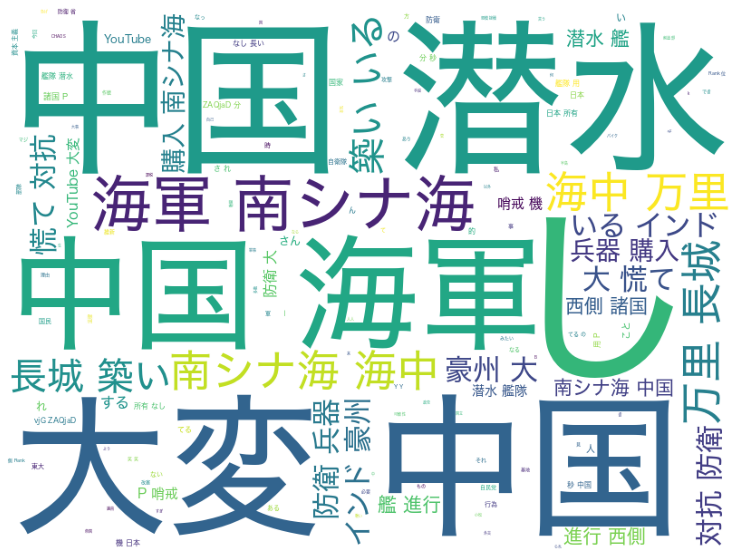

In [395]:
#wordcloud„ÅßÂá∫Âäõ„Åô„Çã„Éï„Ç©„É≥„Éà„ÇíÊåáÂÆö
font_path = "/System/Library/Fonts/„Éí„É©„Ç≠„Çô„ÉéËßí„Ç≥„Çô„Ç∑„ÉÉ„ÇØ W4.ttc"
txt = " ".join(words)

# „Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÅÆË®≠ÂÆö(ÁâπÂÆö„ÅÆ„ÉØ„Éº„Éâ„ÅØÂÖ•„Çâ„Å™„ÅÑ„Çà„ÅÜ„Å´Ë®≠ÂÆö)
stop_words = ['https', 't', 'co',  'RT']

#Ëß£Êûê„Åó„ÅüÂçòË™û„ÄÅ„Çπ„Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„ÇíË®≠ÂÆö„ÄÅËÉåÊôØ„ÅÆËâ≤„ÅØÁôΩ
wordcloud = WordCloud(background_color="white", font_path=font_path, stopwords=set(stop_words),
    width=800,height=600).generate(txt)

fig = plt.figure(figsize=(30, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## „Éù„Ç∏„Éª„Éç„Ç¨ÂàÜÊûê

In [371]:
analyzer = oseti.Analyzer()
print(analyzer.analyze_detail("ÊúÄÂæå„Åæ„ÅßÂ∏åÊúõ„ÇíÊç®„Å¶„Å°„ÇÉ„ÅÑ„Åã„Çì„ÄÇ„ÅÇ„Åç„Çâ„ÇÅ„Åü„Çâ„ÄÅ„Åù„Åì„ÅßË©¶ÂêàÁµÇ‰∫Ü„Å†„Çà„ÄÇ"))
print(analyzer.analyze_detail("Ë™ç„ÇÅ„Åü„Åè„Å™„ÅÑ„ÇÇ„ÅÆ„Å†„Å™„ÄÇËá™ÂàÜËá™Ë∫´„ÅÆ„ÄÅËã•„Åï„ÇÜ„Åà„ÅÆÈÅé„Å°„Å®„ÅÑ„ÅÜ„ÇÇ„ÅÆ„Çí„ÄÇ"))

[{'positive': ['Ê¥ªË∫ç', 'ÊúüÂæÖ'], 'negative': [], 'score': 1.0}]
[{'positive': [], 'negative': ['Ë™ç„ÇÅ„Çã-NEGATION'], 'score': -1.0}, {'positive': ['Ëã•„ÅÑ'], 'negative': ['ÈÅé„Å°'], 'score': 0.0}]


In [396]:
ave_senti = []
for tweet in df['full_text']:
    print(tweet)
    senti = analyzer.analyze(tweet)
    print(analyzer.analyze_detail(tweet), np.mean(senti))
    ave_senti.append(np.mean(senti))
ave_senti

„ÄêÂ§ßÂ§â„Å†ÔºÅ„Äé‰∏≠ÂõΩÊµ∑Ëªç„ÅåÂçó„Ç∑„ÉäÊµ∑„Å´„ÄåÊµ∑‰∏≠‰∏áÈáå„ÅÆÈï∑Âüé„Äç„ÇíÁØâ„ÅÑ„Å¶„ÅÑ„ÇãÔºÅ„Äè„Ç§„É≥„Éâ„ÉªË±™Â∑ûÂ§ßÊÖå„Å¶„ÅßÂØæÊäóÈò≤Ë°õÂÖµÂô®Ë≥ºÂÖ•ÔºÅ„ÄëÂçó„Ç∑„ÉäÊµ∑„Åß‰∏≠ÂõΩÊΩúÊ∞¥Ëâ¶„ÅåÂ§ßÈÄ≤Ë°åÔºÅË•øÂÅ¥Ë´∏ÂõΩ... https://t.co/CKFt50gGip @YouTube„Çà„Çä
[{'positive': [], 'negative': ['Â§ßÂ§â'], 'score': -1.0}, {'positive': [], 'negative': ['ÊÖå„Å¶„Çã', 'ÂØæÊäó'], 'score': -1.0}, {'positive': [], 'negative': [], 'score': 0.0}, {'positive': [], 'negative': [], 'score': 0.0}] -0.5
„ÄåË´∏‰∫∫ÁöÜÊ≠ª„Åó„Å¶ÁÑ°ÈñìÂú∞ÁçÑ„Å´Â†ï„Å§„Çã„Åì„Å®Èõ®„ÅÆ„Åî„Å®„Åè„Åó„Åí„Åã„Çâ„ÇìÊôÇ„ÄÅÊ≠§„ÅÆ‰∫îÂ≠ó„ÅÆÂ§ßÊõºËçºÁæÖ„Å†„Çâ„ÇíË∫´„Å´Â∏Ø„ÅóÂøÉ„Å´Â≠ò„Åú„Å∞„ÄÅË´∏Áéã„ÅØÂõΩ„ÇíÊâ∂„Åü„Åô„Åë‰∏áÊ∞ë„ÅØÈõ£„Çí„ÅÆ„Åå„Çå„Çì„Äç‚ÄïÈò≤Ë°õÊâãÊÆµ„ÅÆÊúÄÂñÑ„ÇíÂ∞Ω„Åè„Åó„Åü„Å®„Åó„Å¶„ÇÇ„ÄÅ‰ªèÊ≥ï„Å´ËÉå„Åè„Å™„Çâ„Å∞„ÄÅ‰ªñÂõΩ„ÅÆ‰æµÁï•„ÇíÈò≤„Åê„Åì„Å®„ÅØ„Åß„Åç„Å™„ÅÑ„ÄÄ#È°ïÊ≠£‰ºö #ÂõΩÁ´ãÊàíÂ£á„ÄÄhttps://t.co/Wz5Vhvq9vD
[{'positive': ['Ê≠ª-NEGATION', 'Âú∞ÁçÑ-NEGATION', 'Èõ£-NEGATION', 'ËÉå„Åè-NEGATION', '‰æµÁï•-NEGATION'], 'negative': ['ÂøÉ

[-0.5,
 0.0,
 0.0,
 -0.22222222222222224,
 0.5,
 -0.6,
 -0.5,
 -0.6,
 -0.42857142857142855,
 -0.5,
 0.2,
 0.16666666666666666,
 -0.4,
 -0.2857142857142857,
 0.1,
 -0.5,
 -0.16666666666666666,
 -0.22222222222222224,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.75,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.08333333333333333,
 -0.5,
 -0.5,
 -0.4,
 -0.6,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 1.0,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.25,
 -0.5,
 -0.5,
 -0.5,
 -0.5,
 -0.3333333333333333,
 0.16666666666666669,
 -0.25,
 0.6666666666666666,
 -0.2,
 1.0,
 -1.0,
 0.0,
 -0.33333333333333337,
 0.0,
 0.0,
 0.75,
 -0.7142857142857143,
 -0.11111111111111112,
 0.0,
 0.6666666666666666,
 -0.2857142857142857,
 -0.20000000000000004,
 -1.0,
 0.16666666666666666,
 0.6666666666666666,
 0.5,
 0.0,
 -0.5,
 0.0,
 0.0,
 0.14285714285714285,
 0.0,
 -0.08333333333333331,
 0.0,
 0.5,
 -0.2,
 0.0,
 -0.3333333333333333,
 1.0,
 0.6666666666666666,
 -0.6666666666666666,
 -0.5,
 0.6666666666666666,
 -0.125,
 0.0,
 -1.0,
 

([<matplotlib.patches.Wedge at 0x15f91e910>,
 [Text(0.30689022851116454, 1.056323050796661, '„Éç„Ç¨'),
  Text(0.8251221330042984, -0.7274431012982646, '„ÇÑ„ÇÑ„Éç„Ç¨'),
  Text(-1.0999999999999954, 1.0298943258065002e-07, '„ÇÑ„ÇÑ„Éù„Ç∏'),
  Text(-0.46835712939770585, 0.9953098006863695, '„Éù„Ç∏')])

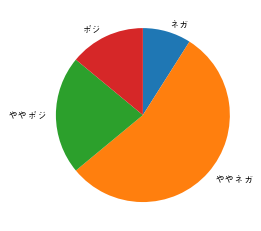

In [397]:
hist, bins = np.histogram(ave_senti, bins=4)
plt.rcParams['font.family'] = "AppleGothic"
plt.pie(hist, labels=['„Éç„Ç¨', '„ÇÑ„ÇÑ„Éç„Ç¨', '„ÇÑ„ÇÑ„Éù„Ç∏', '„Éù„Ç∏'], counterclock=False, startangle=90)

## ÊÑüÊÉÖÂàÜÊûêÔºàTransformer ÁâàÔºâ

In [340]:
!pip install transformers fugashi ipadic

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3.1 MB 3.9 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 285 kB 3.8 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13.4 MB 7.3 MB/s            
  Preparing metadata (setup.py) ... done
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 197 kB 4.2 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 288 kB 5.5 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 895 kB 7.8 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2.2 MB 5.5 MB/s            
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚

In [341]:
from transformers import pipeline 
from transformers import AutoModelForSequenceClassification 
from transformers import BertJapaneseTokenizer 

In [342]:
model = AutoModelForSequenceClassification.from_pretrained('daigo/bert-base-japanese-sentiment') 
tokenizer = BertJapaneseTokenizer.from_pretrained('cl-tohoku/bert-base-japanese-whole-word-masking') 
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer) 

Downloading: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.29k/1.29k [00:00<00:00, 285kB/s]
Downloading: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 422M/422M [01:49<00:00, 4.06MB/s]
Downloading: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 252k/252k [00:00<00:00, 376kB/s]
Downloading: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 479/479 [00:00<00:00, 235kB/s]


In [357]:
print(nlp("ÊúÄÂæå„Åæ„ÅßÂ∏åÊúõ„ÇíÊç®„Å¶„Å°„ÇÉ„ÅÑ„Åã„Çì„ÄÇ„ÅÇ„Åç„Çâ„ÇÅ„Åü„Çâ„ÄÅ„Åù„Åì„ÅßË©¶ÂêàÁµÇ‰∫Ü„Å†„Çà„ÄÇ"))
print(nlp("Ë™ç„ÇÅ„Åü„Åè„Å™„ÅÑ„ÇÇ„ÅÆ„Å†„Å™„ÄÇËá™ÂàÜËá™Ë∫´„ÅÆ„ÄÅËã•„Åï„ÇÜ„Åà„ÅÆÈÅé„Å°„Å®„ÅÑ„ÅÜ„ÇÇ„ÅÆ„Çí„ÄÇ"))

[{'label': '„Éù„Ç∏„ÉÜ„Ç£„Éñ', 'score': 0.6421804428100586}]
[{'label': '„Éç„Ç¨„ÉÜ„Ç£„Éñ', 'score': 0.8296632170677185}]


In [370]:
sentiments = []
for tweet in df['full_text']:
    print(tweet)
    senti = nlp(tweet)
    print(senti)
    sentiments.append(senti[0]['score'])
print(sentiments)
print(np.mean(sentiments))

@jijicom https://t.co/3lp6XON0oVÊµ∑‰∏ä‰øùÂÆâÂÆò„Å´„ÅØ„ÄÅÂàëÊ≥ï„ÇÑÂõΩÈöõÊ≥ï„ÇíÂê´„ÇÄÊ≥ïÂ≠¶„ÅÆÁ¥†È§ä„Äå„ÇÇ„ÄçË¶ÅÊ±Ç„Åï„Çå„Çã„ÄÇ(by Ê≥ïÂ≠¶ÈÉ®Âçí„ÄÇ)„Å°„Å™„Åø„Å´„ÄÅ#Èò≤Â§ß „ÅØÊñáÁ≥ª„ÅÆÂ≠¶Áîü„Å´„ÇÇ„ÄÅÁã≠„ÅÑ„Å™„Åå„Çâ„ÇÇÈñÄÊà∏„ÇíÈñã„ÅÑ„Å¶„ÅÑ„Çã(by È´òÊ†°„ÅÆÊüêÂêåÁ¥öÁîü(ÊñáÁ≥ª)„ÅåÈò≤Â§ß„Å´ÈÄ≤„Çì„Å†)„ÄÇ
[{'label': '„Éù„Ç∏„ÉÜ„Ç£„Éñ', 'score': 0.8955623507499695}]
#Ê®™È†àË≥Ä #Èò≤Â§ß ‰ª§Âíå3Âπ¥Â∫¶Èò≤Ë°õÂ§ßÂ≠¶Ê†°ÈñãÊ†°Á•≠„Å´‰º¥„ÅÜ„Ç∏„Çß„ÉÉ„ÉàÊ©ü„ÅÆÈ£õË°å‰∫àÂÆö„Å´„Å§„ÅÑ„Å¶Ôºà2021Âπ¥11Êúà4Êó•Ôºâhttps://t.co/UBO0Xex44ohttps://t.co/yjaWlaiUb8 https://t.co/1jWhPmyLKA
[{'label': '„Éù„Ç∏„ÉÜ„Ç£„Éñ', 'score': 0.8555366396903992}]
#Ê®™È†àË≥Ä #Êµ¶Ë≥Ä #Èò≤Â§ß Êµ¶Ë≥ÄÈßÖ„Åß1Â≠¶Âπ¥Áîü„ÇíÂëº„Å≥Ê≠¢„ÇÅ„Å¶ÈñãÊ†°Á•≠„Å´„Å§„ÅÑ„Å¶Ë≥™Âïè„Åó„Å†„Åå„ÄÅ„ÇÑ„ÅØ„ÇäÂÆ∂Êóè„ÅÆ„ÅøÊãõÂæÖ„Åß‰∏ÄËà¨ÂÖ¨Èñã„ÅØÁÑ°„ÅÑ„Å®„ÅÆ‰∫ã„ÄÇÂëº„Å≥Ê≠¢„ÇÅ„ÅüÊôÇ„Å´‰Ωï‰∫ã„Åã„Å®Âºï„Åã„Çå„Å¶„Åó„Åæ„Å£„ÅüorzÊµ¶Ë≥ÄÈßÖ„ÅßÈôç„Çä„Åü„Å®„ÅÑ„ÅÜ‰∫ã„ÅØ„ÅÇ„ÅÆÂ±±„ÅÆ‰∏≠„ÅÆÊÄ•ÈöéÊÆµ„Çí‰∏ä„Åå„Çã„ÅãÂçó„Åã„Çâ„ÅÆÂùÇ„ÇíÁôª„Çã„Çì„Å†„Å™„ÄÇ
[{'label': '„Éù„Ç∏„ÉÜ„Ç£„Éñ', 'score': 0

## Ë™≤È°å
ÂêÑËá™„ÅÆ„ÉÜ„Éº„Éû„Åß Tweet „ÇíÂàÜÊûê„Åõ„Çà„ÄÇ